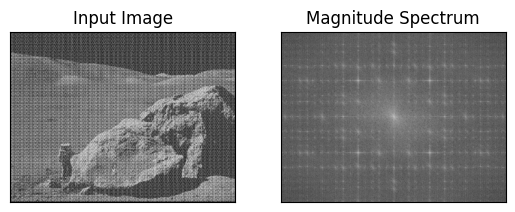

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('periodic_noise.jpg', cv.IMREAD_GRAYSCALE)
 
dft = cv.dft(np.float32(img),flags = cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
 
magnitude_spectrum = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
 
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

In [2]:
#Filter creating
# Low pass filter
mask = np.zeros((img.shape[0],img.shape[1],2),np.uint8)
centerX, centerY = (int(img.shape[0] / 2),int(img.shape[1] / 2))
mask[centerX-50:centerX+50, centerY - 50:centerY+50,:] = 1

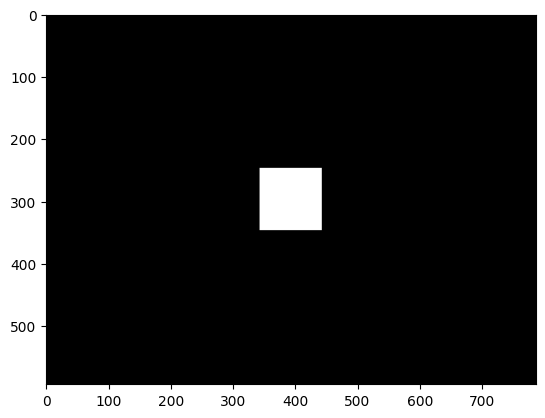

In [3]:
plt.imshow(mask[:,:,0], cmap = 'gray')

In [4]:
# Filtering
dft_shift = dft_shift*mask

C:\Users\ilya_\AppData\Local\Temp\ipykernel_2100\3830399572.py:1: RuntimeWarning: divide by zero encountered in log
  filtering_magn_res = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))


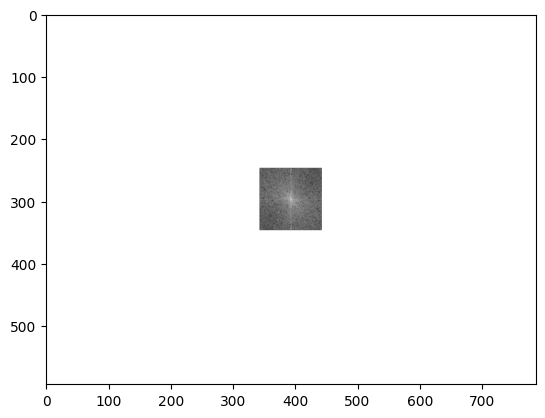

In [5]:
filtering_magn_res = 20*np.log(cv.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
plt.imshow(filtering_magn_res, cmap='gray')

In [6]:
#fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(dft_shift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:,:,0],img_back[:,:,1])

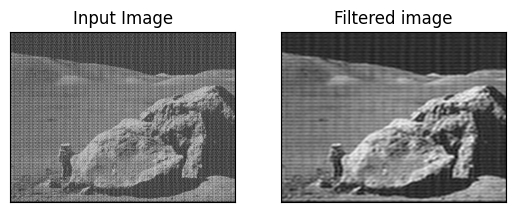

In [7]:
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Filtered image'), plt.xticks([]), plt.yticks([])
plt.show()

In [94]:
# Реализуйте высокочастотную фильтрацию на основе ядра Гаусса
# Реализуйте удаление периодического шума

In [96]:
from skimage.feature import peak_local_max
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity
import os
 
img = cv.imread('periodic_noise.jpg', cv.IMREAD_GRAYSCALE)

In [97]:
# Реализуйте высокочастотную фильтрацию на основе ядра Гаусса

In [98]:
kernel = np.array([[1, 4, 6, 4, 1],
                   [4,16,24,16, 4],
                   [6,24,36,24, 6],
                   [4,16,24,16, 4],
                   [1, 4, 6, 4, 1]]) / 256

In [99]:
blur = cv.filter2D(img.astype(float), -1, kernel)

In [100]:
high_freq = img.astype(float) - blur
result = np.uint8(np.clip(high_freq + 128, 0, 255))

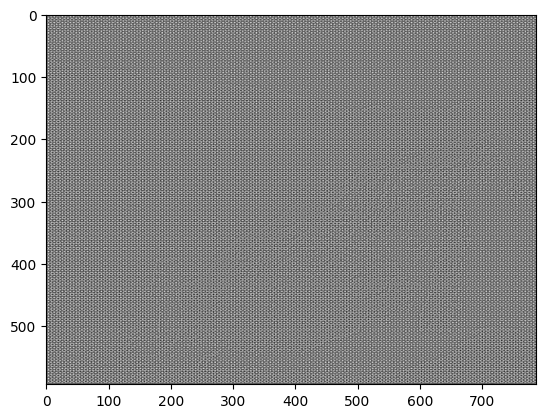

In [101]:
plt.imshow(result, cmap = 'gray')

In [102]:
# Реализуйте удаление периодического шума удлить максимумы в образе фурье

In [103]:
dft = cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

In [104]:
magnitude_spectrum = 20 * np.log(cv.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
local_max = peak_local_max(magnitude_spectrum, min_distance=15, threshold_abs=200)

In [105]:
rows, cols = img.shape
mask = np.copy(dft_shift)
mask[:, :, :] = 1

In [106]:
for i in local_max:
    r = np.int32(((i[0] - rows // 2) ** 2 + (i[1] - cols // 2) ** 2) ** (1 / 2))
    cv.circle(mask, (rows // 2, cols // 2), r, (0, 0))

In [107]:
dft_shift = dft_shift * mask

In [108]:
f_ishift = np.fft.ifftshift(dft_shift)
img_back = cv.idft(f_ishift)
img_back = cv.magnitude(img_back[:, :, 0], img_back[:, :, 1])

In [109]:
plt.figure(figsize=(15, 6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

Text(0.5, 1.0, 'Исходное изображение')

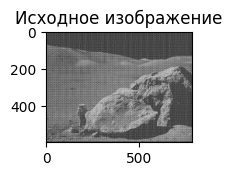

In [110]:
plt.subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Исходное изображение')

Text(0.5, 1.0, 'Спектр до удаления')

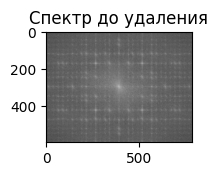

In [111]:
plt.subplot(1,3,2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Спектр до удаления')

Text(0.5, 1.0, 'Удаление периодического шума')

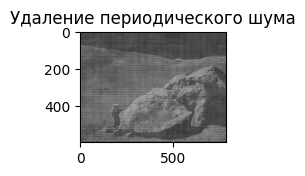

In [112]:
plt.subplot(133)
plt.imshow(img_back, cmap='gray')
plt.title('Удаление периодического шума')

In [113]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>